In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


#Getting some information about data.

In [40]:
df.shape   #tells you the number of records

(168029, 13)

In [41]:
df.info()      #tells the information about columns and its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168029 entries, 0 to 168028
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      168029 non-null  object 
 1   brand_name        168029 non-null  object 
 2   rating            168029 non-null  float64
 3   rating_count      168029 non-null  int64  
 4   marked_price      168029 non-null  int64  
 5   discounted_price  168029 non-null  int64  
 6   sizes             168029 non-null  object 
 7   product_link      168029 non-null  object 
 8   img_link          168029 non-null  object 
 9   product_tag       168029 non-null  object 
 10  brand_tag         168029 non-null  object 
 11  discount_amount   168029 non-null  int64  
 12  discount_percent  168029 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 16.7+ MB


In [42]:
df.isnull().sum()    #tells how many null values are present in data set, in this case there are no null values

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
dtype: int64

In [56]:
#checking and dropping duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
168024     True
168025     True
168026     True
168027     True
168028     True
Length: 168029, dtype: bool

In [57]:
df.duplicated().sum()

21418

In [58]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

#1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids
1.   Finding Unique Products as per their Product ID
2.   Removing Products with Duplicate Product ID




In [244]:
df['product_name'].nunique()

46013

#2. What is the average rating of the products? (2 mark)
Try it without the product that are having rating 0 Try it without the product that are having 0 people given any rating

In [61]:
df['rating'].mean()  #might be differ as many products are not rated or rated as 0

2.317154238085819

In [62]:
#calculating average rating of non-zero rated products
rating=0
count =0

for i in df['rating']:
  if (i !=0.0):
    rating +=i
    count +=1

avg_rating= rating/count
print('The average rating of the products: ', round(avg_rating, 2))


The average rating of the products:  4.17


#3. What is the average discount percentage of the products? (1 mark)

In [75]:
df['discount_percent']

0         36
1         55
2         20
3         10
4          0
          ..
167987    60
167988    61
167989    45
167990    50
167991     0
Name: discount_percent, Length: 146611, dtype: int64

In [83]:
df['discount_percent'].mean()   #might be differ as many products are not rated or discounted as 0

37.147765174509416

In [82]:
#calculating average rating of non-zero discounted products
discount=0
count =0

for i in df['discount_percent']:
  if (i !=0):
    discount +=i
    count +=1

avg_discount= discount/count
print('The average discount percent of the products: ', round(avg_discount, 2))


The average discount percent of the products:  45.1


#4. What are the top 5 most expensive products? (2 marks)
Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [287]:
#5 most expensive products (marked prices)
df.groupby('product_name').mean()['marked_price'].sort_values(ascending=False).head(5)

<ipython-input-287-8b521e6101c6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_name').mean()['marked_price'].sort_values(ascending=False).head(5)


product_name
Lord Krishna Showpiece                                              113999.000000
Durga Maa On Lion Showpiece                                          71999.000000
Men Stainless Steel Straps Multi Function Automatic Motion Watch     57200.000000
Men Stainless Steel Straps Automatic Motion Watch                    46077.222222
Men Leather Straps Multi Function Automatic Motion Watch             45825.000000
Name: marked_price, dtype: float64

In [288]:
#5 most expensive products (discounted prices)
df.groupby('product_name').mean()['discounted_price'].sort_values(ascending=False).head(5)

<ipython-input-288-096ffd1a649f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_name').mean()['discounted_price'].sort_values(ascending=False).head(5)


product_name
Lord Krishna Showpiece              45599.0
Airwrap Complete Hair Styler        44900.0
Mid-Rise Stretchable Jeans          41000.0
Printed Carpets                     40350.0
Men Brass Dial & Automatic Watch    40050.0
Name: discounted_price, dtype: float64

#5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [89]:
#unique brands in data set
len(df['brand_name'].unique())

3194

In [116]:
#product counts in different brands
df_brand=df.groupby('brand_name')['product_name'].count()
df_brand.sort_values(ascending=False).head(10)


brand_name
Roadster                 4557
Mast & Harbour           2398
DressBerry               2077
H&M                      1998
Anouk                    1785
max                      1773
HRX by Hrithik Roshan    1746
Puma                     1668
MANGO                    1626
HERE&NOW                 1620
Name: product_name, dtype: int64

#6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [255]:
df_brand_rating = df[df['rating'] != 0]
df_brand_rating.groupby('brand_name').mean()['rating'].sort_values(ascending=False).head(5)


<ipython-input-255-456adcdc5185>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_brand_rating.groupby('brand_name').mean()['rating'].sort_values(ascending=False).head(5)


brand_name
1 Stop Fashion              5.0
Luxure by Louis Philippe    5.0
Tiara                       5.0
Anahi                       5.0
SHIRT THEORY                5.0
Name: rating, dtype: float64

#7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
  
  1.H&M

  2.max

  3.Puma

  4.MANGO

Neglect the products which are not reviewed by any person

<ipython-input-308-6f3a5dbaa21d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('brand_name').mean()['rating'].plot()


<Axes: xlabel='brand_name'>

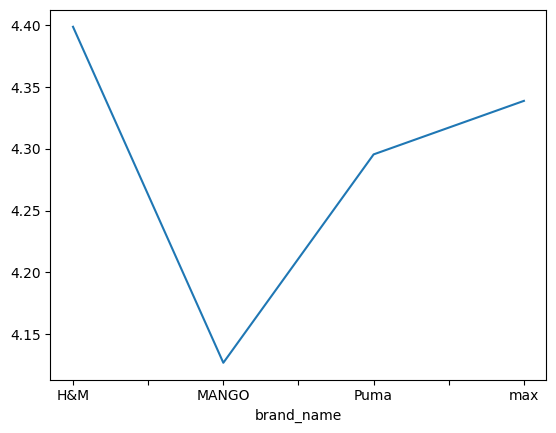

In [308]:
#Filtering out the required columns from dataframe 
brands = ['H&M', 'max', 'Puma', 'MANGO']
df1=df[df['brand_name'].isin(brands)]
#neglecting the zero rating
df1 = df1[df1['rating'] != 0]
#plotting ratings of mentions brands
df1.groupby('brand_name').mean()['rating'].plot()

From the above plot we can say that there is a very less difference between the ratings of the brands. These 4 brands are most liked by the customers.

#8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)
   
   1.H&M

   2.max

   3.Puma

   3.MANGO

Neglect the products which are not reviewed by any person. Neglect the products which are not on any discount.

<ipython-input-309-6886fbd26bc8>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('brand_name').mean()['discount_percent'].plot()


<Axes: xlabel='brand_name'>

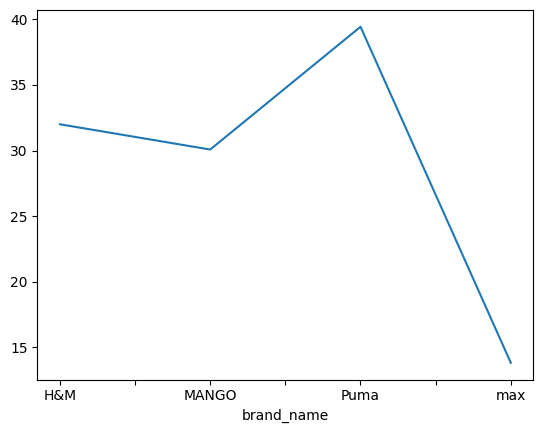

In [309]:
#Filtering out the required columns from dataframe 
brands = ['H&M', 'max', 'Puma', 'MANGO']
df2=df[df['brand_name'].isin(brands)]
#neglecting the zero rating
df2 = df1[df1['discount_percent'] != 0]
#plotting ratings of mentions brands
df2.groupby('brand_name').mean()['discount_percent'].plot()

#Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

#10. What are the top 10 most popular tags in the dataset? (2 marks)

In [145]:
#top 10 popular product tags
df.groupby('product_tag').size().sort_values(ascending=False).head(10)

product_tag
tshirts         16978
shirts          12044
dresses         11836
tops             9049
kurta-sets       8170
kurtas           8043
jeans            7669
trousers         5756
casual-shoes     5230
handbags         4944
dtype: int64

#11. Are there any relations between the rating and number of people who rated the products? (4 marks)
Neglect the products that are not reviewed by any person

Neglect the products that are having zero rating

#12. What are the top 10 Most Expensive brands? (3 marks)
Use marked price as the reference to find the most expensive brand

In [257]:
#top 10 most expensive brands
df.groupby('brand_name').mean()['marked_price'].sort_values(ascending = False).head(10)

<ipython-input-257-49b9ece5303a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('brand_name').mean()['marked_price'].sort_values(ascending = False).head(10)


brand_name
EARNSHAW                 47603.846154
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             31665.666667
Name: marked_price, dtype: float64

#13. What are the top 10 Most Expensive Product Category? (4 marks)
Use marked price as the reference to find the most expensive brand

In [258]:
#top 10 most expensive product tags
df.groupby('product_tag').mean()['marked_price'].sort_values(ascending=False).head(10)

<ipython-input-258-b1b48df56793>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_tag').mean()['marked_price'].sort_values(ascending=False).head(10)


product_tag
trolley-bag           13329.343333
suits                 11926.784566
fitness-bands         11713.285714
watch-gift-set        10951.516129
badminton-racquets    10850.000000
sherwani              10004.250000
floor-lamps            8979.891892
smart-watches          8946.029661
air-fryer              8850.000000
carpets                8693.397727
Name: marked_price, dtype: float64

#14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)
Take Marked Price for Reference
Take product_tag as watches
Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
Make sure to write your inference based on the violen plot of following watch brands price

#15. List top 5 brands which are having most wide range or products
Use marked price as the reference


In [231]:
#top five brands having wide range of products
df.groupby('brand_name')['product_tag'].nunique().sort_values(ascending=False).head(10)


brand_name
H&M                74
Marks & Spencer    53
MANGO              50
max                50
Roadster           49
DressBerry         49
FOREVER 21         45
Mast & Harbour     44
Puma               41
URBANIC            40
Name: product_tag, dtype: int64